In [78]:
import numpy as np
import pandas as pd


##classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

##train test split
from sklearn.model_selection import train_test_split

##scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import cross_val_score  

##Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline


In [79]:
predata = pd.read_csv('c:\\ml\\LoanPredOrig.csv')
predata = predata.dropna()
#Categorical data clean up, this will error if you try to run this twice consecutively, without reloading the dataset
predata['Loan_Status'] = predata.Loan_Status.astype(int)
predata['Employed'] = np.where(predata['Employed'].str.contains('YES'), 1, 0)
predata['Marital_Status'] = np.where(predata['Marital_Status'].str.contains('YES'), 1, 0)
predata['Graduate'] = np.where(predata['Graduate'].str.contains('YES'), 1, 0)
predata['Credit_History'] = np.where(predata['Credit_History'].str.contains('YES'), 1, 0)
predata['PropertyOwner'] = np.where(predata['PropertyOwner'].str.contains('YES'), 1, 0)
df = pd.DataFrame(predata)

#Drop the Loanid column
del df['Loanid']

#One hot encding on the Gender column
data = pd.get_dummies(df,columns=['Gender'])

In [80]:
#data.head()
#print(data.info()) 
print(data.columns)
print("dimension of data data: {}".format(data.shape))
print(data.groupby('Loan_Status').size())

data.info()

Index(['Marital_Status', 'Dependents', 'Graduate', 'Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'PropertyOwner', 'Loan_Status',
       'Gender_Female', 'Gender_Male'],
      dtype='object')
dimension of data data: (1100, 13)
Loan_Status
0    357
1    743
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1100
Data columns (total 13 columns):
Marital_Status       1100 non-null int32
Dependents           1100 non-null int64
Graduate             1100 non-null int32
Employed             1100 non-null int32
ApplicantIncome      1100 non-null float64
CoapplicantIncome    1100 non-null float64
LoanAmount           1100 non-null int64
Loan_Amount_Term     1100 non-null int64
Credit_History       1100 non-null int32
PropertyOwner        1100 non-null int32
Loan_Status          1100 non-null int32
Gender_Female        1100 non-null uint8
Gender_Male          1100 non-null uint8
dtypes: float64

In [81]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Loan_Status'], data['Loan_Status'], stratify=data['Loan_Status'], test_size=0.30)
X_train, y_train = (data.loc[:, data.columns != 'Loan_Status'], data['Loan_Status'])


In [82]:
print("Shape of the X_train dataset: ", X_train.shape)
print("Shape of the y_train dataset: ", y_train.shape)
#print("Shape of the X_test dataset: ", X_test.shape)
##print("Shape of the y_test dataset: ", y_test.shape)
print('/n')
print("Training Dataset, counts of label '1': {}".format(sum(y_train==1)))
print("Training Dataset, counts of label '0': {}".format(sum(y_train==0)))
#print("Testing Dataset, counts of label '1': {}".format(sum(y_test==1)))
#print("Testing Dataset, counts of label '0': {}".format(sum(y_test==0)))

Shape of the X_train dataset:  (1100, 12)
Shape of the y_train dataset:  (1100,)
/n
Training Dataset, counts of label '1': 743
Training Dataset, counts of label '0': 357


estimator : estimator object.
This is assumed to implement the scikit-learn estimator interface
param_grid : dict or list of dictionaries
Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries,
cv : int, cross-validation generator.Determines the cross-validation splitting strategy. 
n_jobs : int (default=None) Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
return_train_score : boolean, optional,  If False, the cv_results_ attribute will not include training scores.computing the scores on the training set can be computationally expensive and is not strictly required to select the parameters that yield the best generalization performance.
This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)
kfold =StratifiedKFold(n_splits=10)
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy', return_train_score=False,n_jobs=-1)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [84]:
grid.fit(X_train, y_train)

# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
#print(grid.cv_results_)

,mean_test_score,std_test_score,params
0,0.700000,0.081821,{'n_neighbors': 1}
1,0.637273,0.053168,{'n_neighbors': 2}
2,0.762727,0.099097,{'n_neighbors': 3}
3,0.725455,0.080155,{'n_neighbors': 4}
4,0.781818,0.096688,{'n_neighbors': 5}
5,0.760000,0.086564,{'n_neighbors': 6}
6,0.772727,0.103055,{'n_neighbors': 7}
7,0.760909,0.093935,{'n_neighbors': 8}
8,0.775455,0.108862,{'n_neighbors': 9}
9,0.761818,0.095381,{'n_neighbors': 10}


[ 0.7         0.63727273  0.76272727  0.72545455  0.78181818  0.76
  0.77272727  0.76090909  0.77545455  0.76181818  0.77090909  0.76636364
  0.76636364  0.75909091  0.76363636  0.75727273  0.75545455  0.75090909
  0.74909091  0.74818182  0.74636364  0.74454545  0.74545455  0.74545455
  0.73818182  0.73636364  0.72909091  0.73454545  0.73090909  0.73181818]
0.781818181818
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


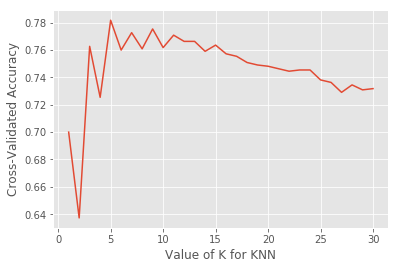

In [86]:

# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

The MLP Classifier has the default of 1 hidden layer and 100 neurons.
Typically this default setting is in line with research that suggests there are not many models that need 2 or more hidden layers to solve a problem.
Next we need to decide how many neurons are needed, too few then we risk underfitting, too many and we risk
overfitting. We will use the GridsearchCV to search out the optimal model settings.
Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better. An additional sgd exists but this did not appear as one on the beter solver for this data set.

In [ ]:
import itertools
from itertools import product
from sklearn.model_selection import GridSearchCV
from numpy import array
hidlay = list(range(1, 101))
parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=2)],'solver': ['lbfgs','adam']} 
#parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=2)]}
##parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=2)]} ##change repeat for hidden layers
##parameters = {'hidden_layer_sizes': [x for x in itertools.product(hidlay,repeat=1)],'solver': ['lbfgs','adam','sgd']} review different solvers

grid = GridSearchCV(estimator=MLPClassifier(), 
                    param_grid=parameters,
                    cv=kfold,
                    scoring='accuracy', return_train_score=False,n_jobs=-1)


grid.fit(X_train, y_train)

# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
# print the array of mean scores only

grid_mean_scores = grid.cv_results_['mean_test_score']
HL_range = grid.cv_results_['param_hidden_layer_sizes']
hl_range = array(HL_range)
print(hl_range)
print(grid_mean_scores)

li =[]
for i in range(len(grid_mean_scores)):
    li.append(i)

    
#print(grid.cv_results_)

plt.plot(li, grid_mean_scores)
plt.xlabel('No. of MLP Grid Run')
plt.ylabel('Cross-Validated Accuracy')
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

The next section will use a BoxPlot to compare accuracy scores using the tuned paramters for the machine learning models

In [ ]:

clfs = []
clfs.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
clfs.append(('NB', GaussianNB()))
clfs.append(('ANN', MLPClassifier(hidden_layer_sizes=(84,16), solver='lbfgs')))## change these parameters if required for the best values
kfold =StratifiedKFold(n_splits=10)
results = []
names = []
scoring = 'accuracy'
for name, clf in clfs:
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(scores)
    names.append(name)
    msg = "%s: Mean: %f  Std:(%f)" % (name, scores.mean(), scores.std())
    print(msg)


fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

